### Implementation of [adversarial autoencoders](https://arxiv.org/abs/1511.05644)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from util import get_mnist,remove_warnings,gpu_sess
from aae_class import AAE_class
remove_warnings()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages loaded (tf:%s)."%(tf.__version__))

Packages loaded (tf:1.8.0).


### Instantiate AAE

In [2]:
tf.reset_default_graph() # reset graph first
tf.set_random_seed(0); np.random.seed(0) # fix seeds 
sess = gpu_sess()
AAE = AAE_class(_name='aae_mnist',_x_dim=784,_z_dim=2,
                 _h_dims_Q=[1024,512],_h_dims_P=[512,1024],_h_dims_D=[512,256],
                 _actv_Q=tf.nn.relu,_actv_P=tf.nn.relu,_actv_D=tf.nn.relu,
                 _l2_reg_coef=1e-4,
                 _opmz=tf.train.RMSPropOptimizer,_lr=5e-4,
                 _sess=sess,_seed=0,
                 _VERBOSE=False)
print ("[%s] instatiated."%(AAE.name))

[aae_mnist] instatiated.


### Train

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


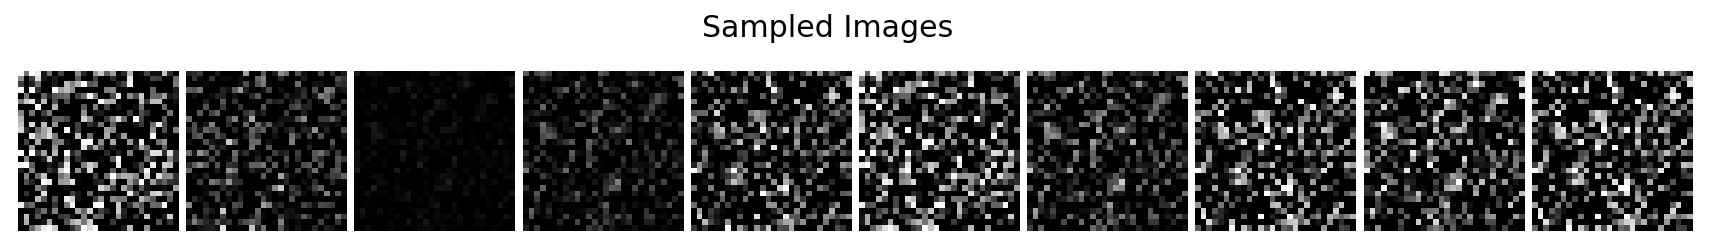

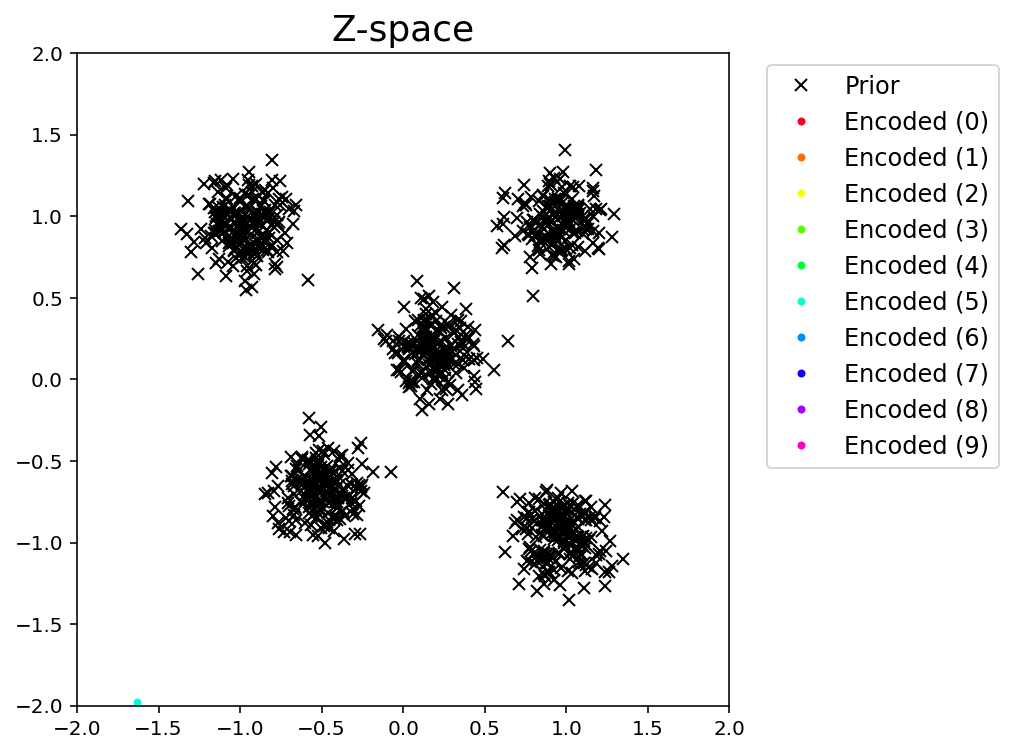

[1000/10000]Loss AE:43.609 D:1.385 G:0.694 total loss:45.688


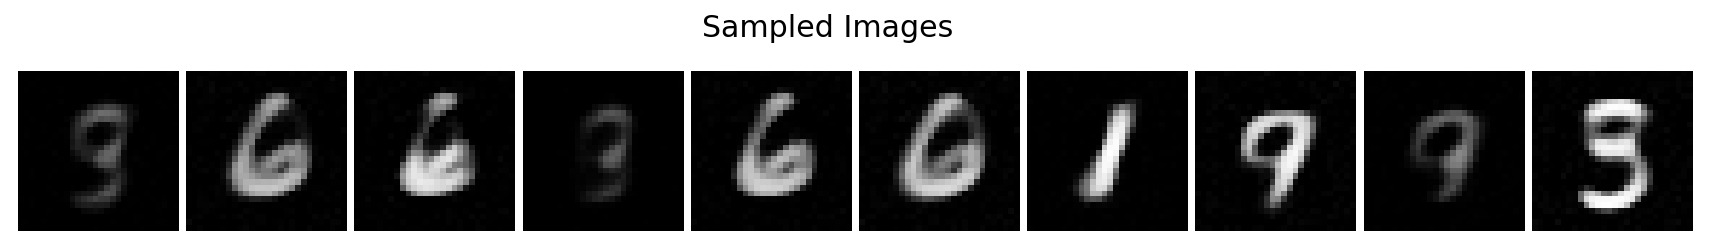

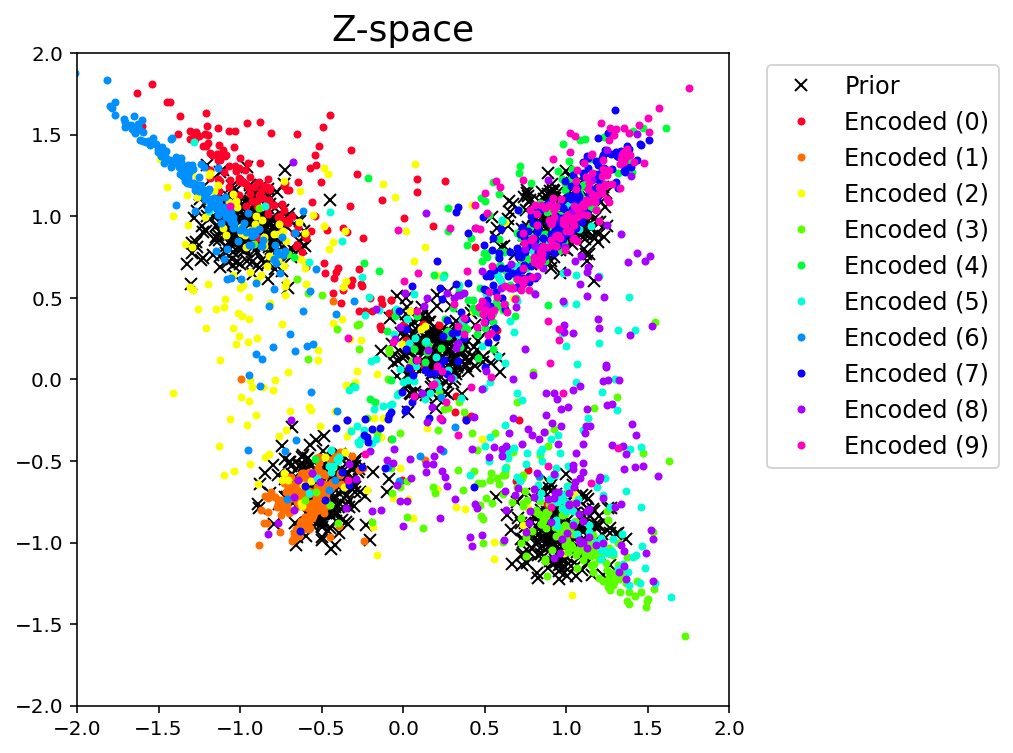

[2000/10000]Loss AE:42.291 D:1.386 G:0.694 total loss:44.371


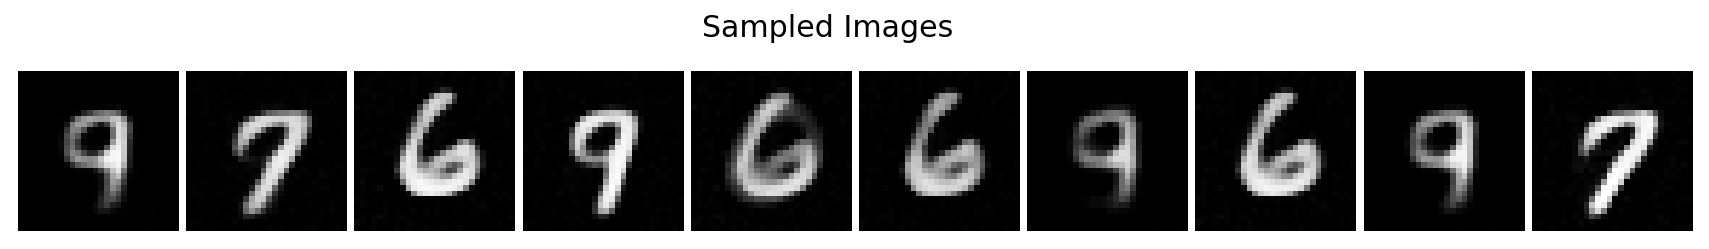

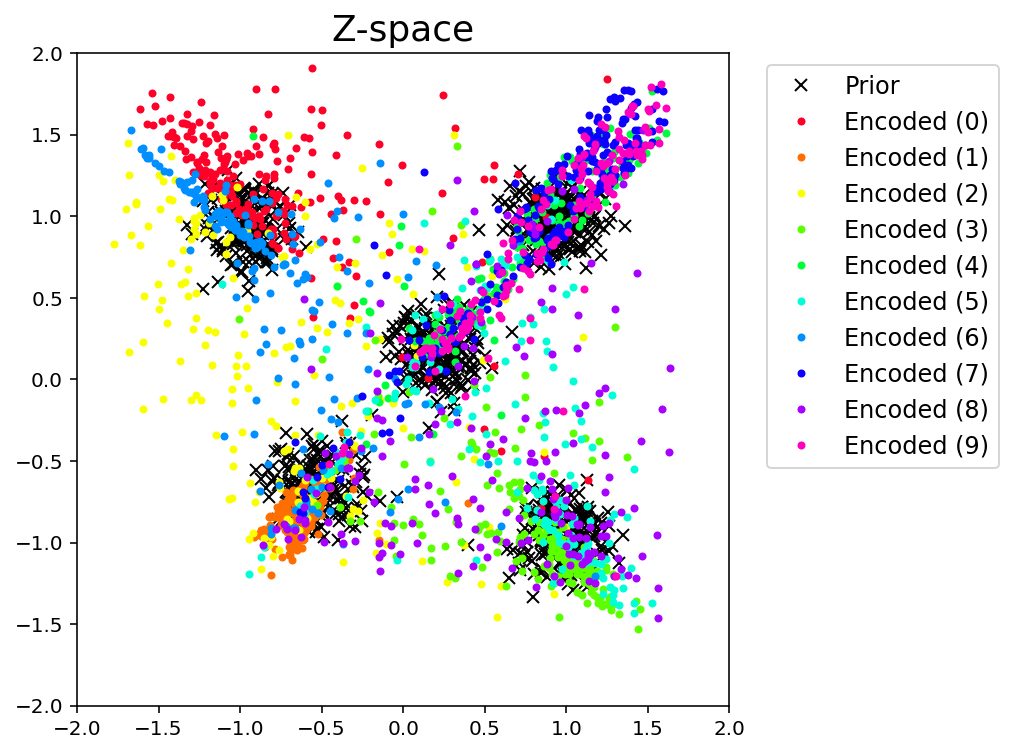

[3000/10000]Loss AE:40.734 D:1.386 G:0.693 total loss:42.814


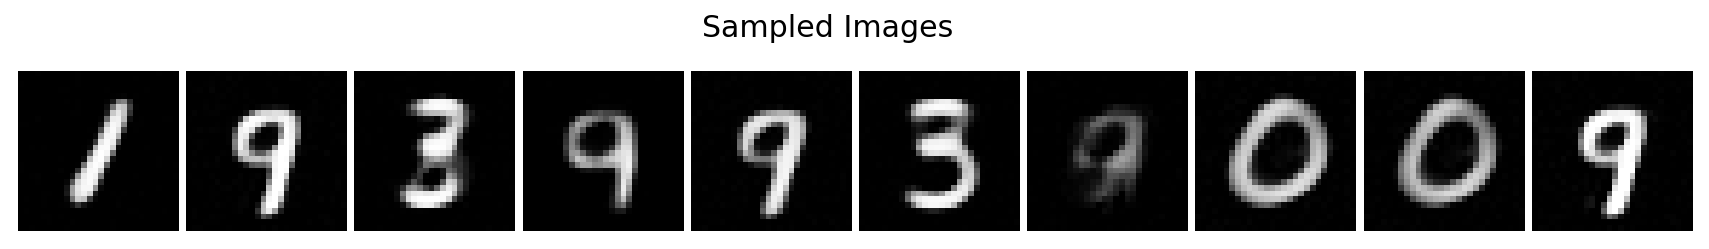

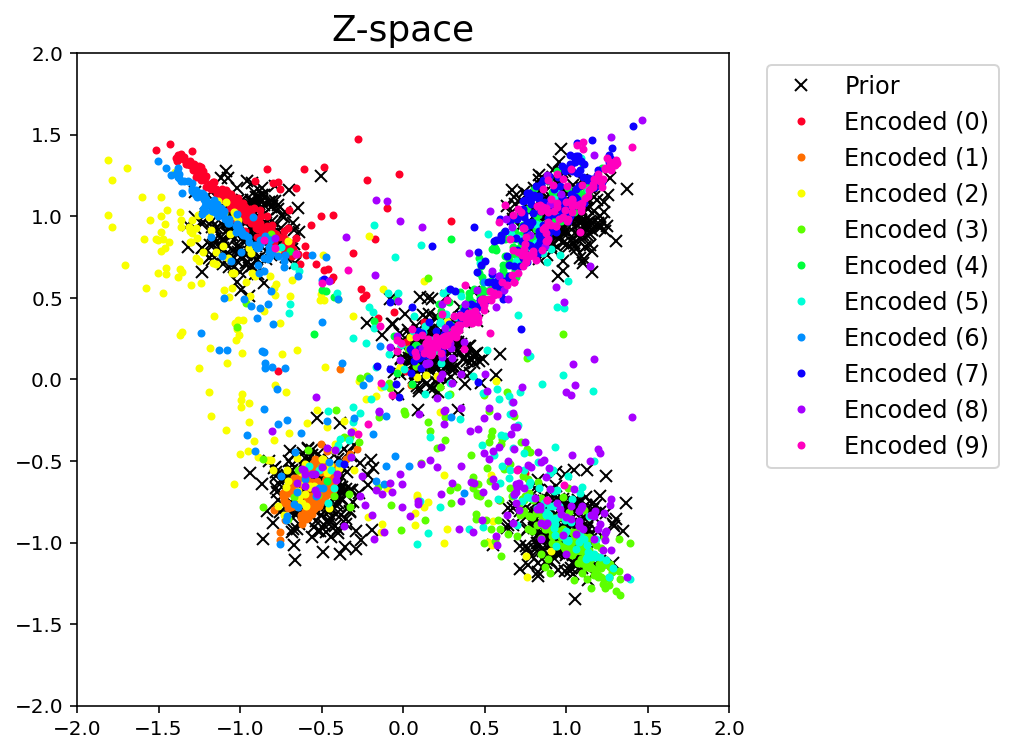

[4000/10000]Loss AE:39.558 D:1.386 G:0.693 total loss:41.637


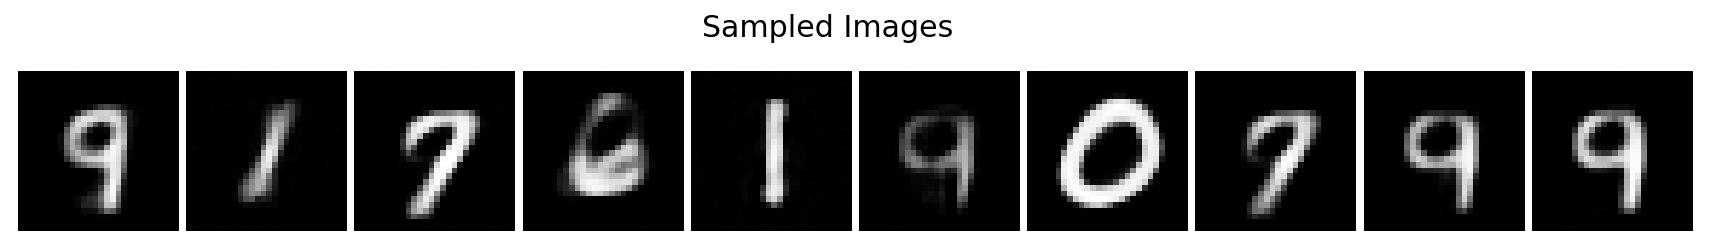

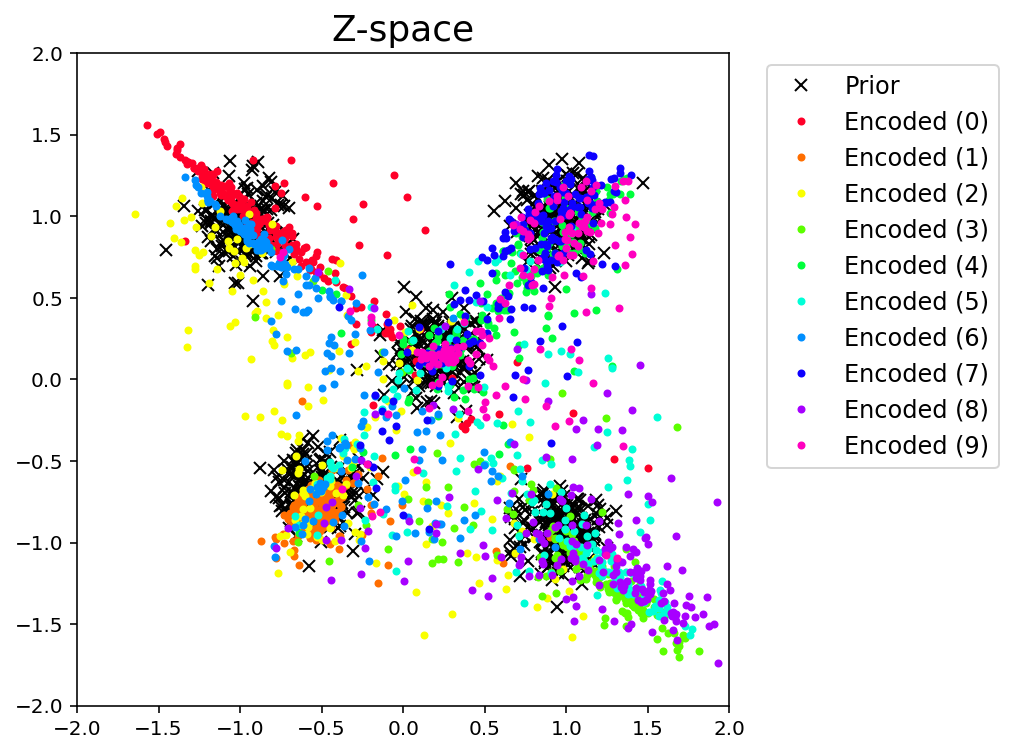

[5000/10000]Loss AE:37.088 D:1.386 G:0.693 total loss:39.167


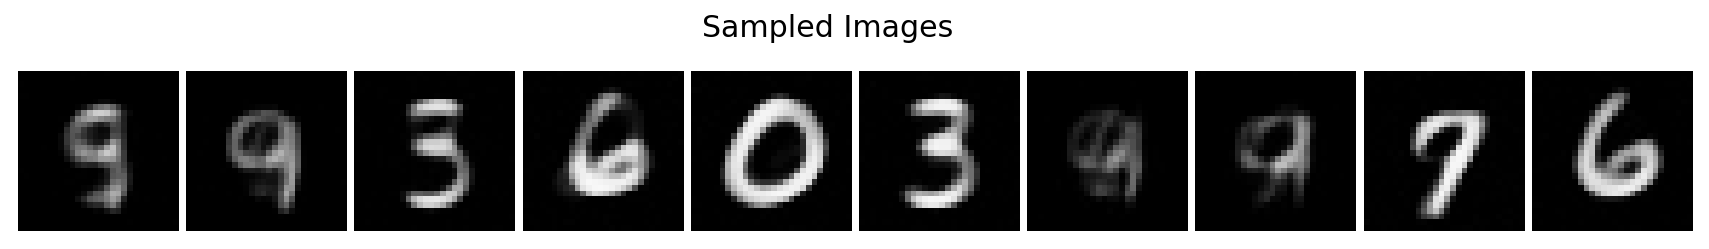

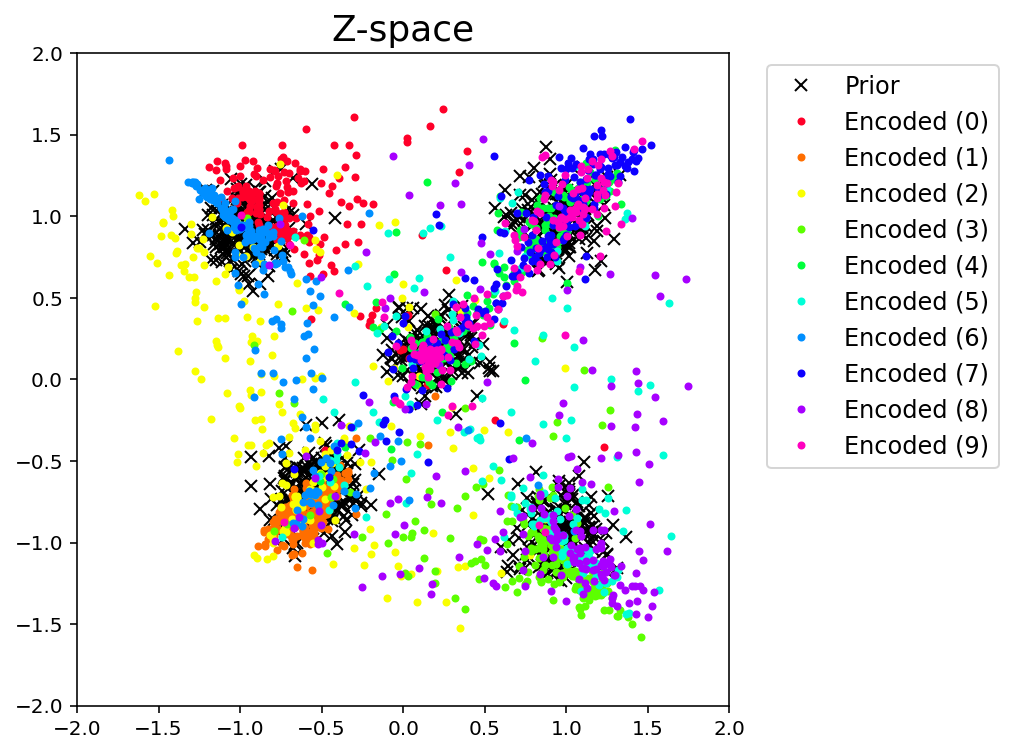

[6000/10000]Loss AE:37.290 D:1.386 G:0.693 total loss:39.370


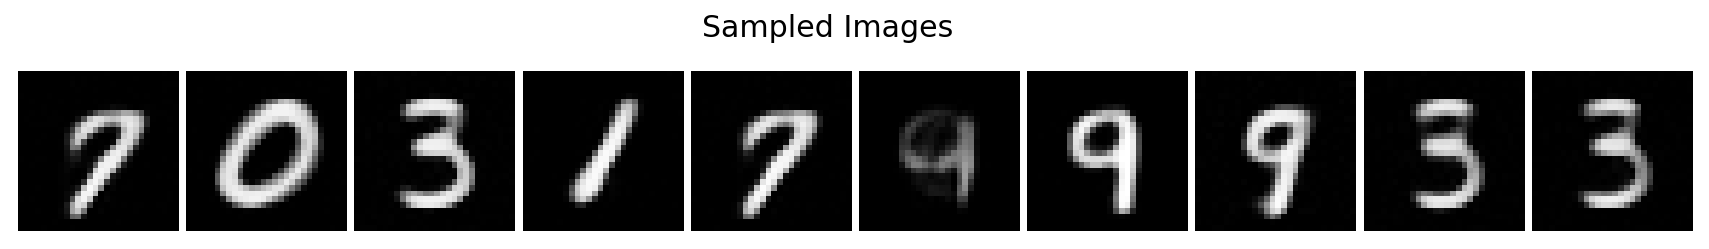

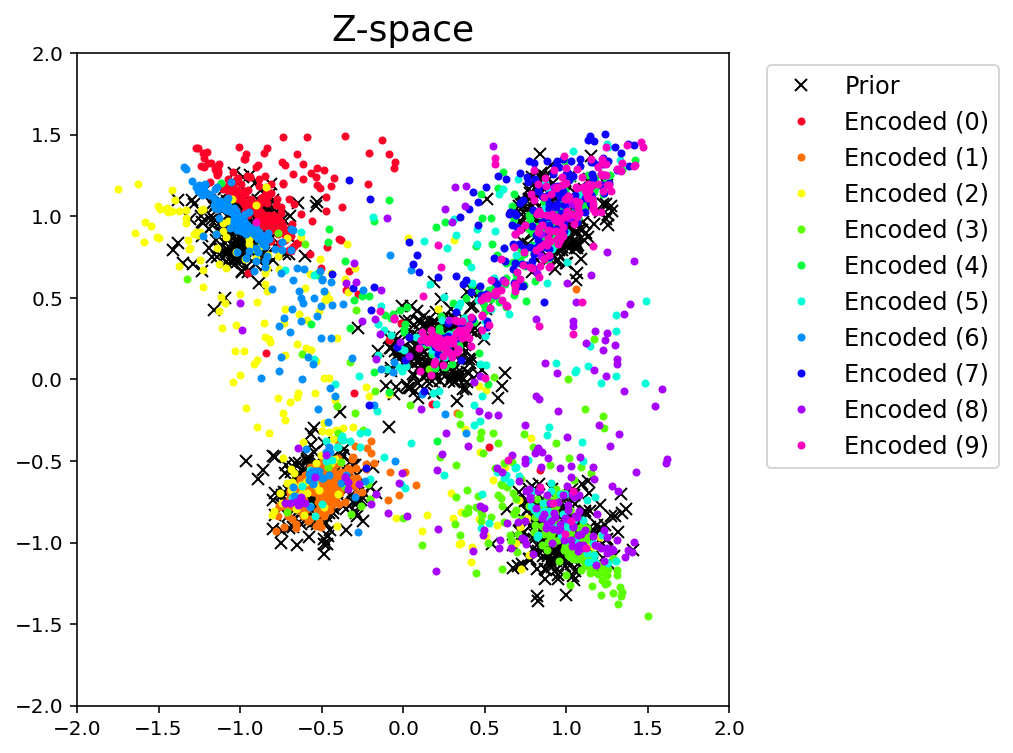

[7000/10000]Loss AE:36.989 D:1.386 G:0.694 total loss:39.069


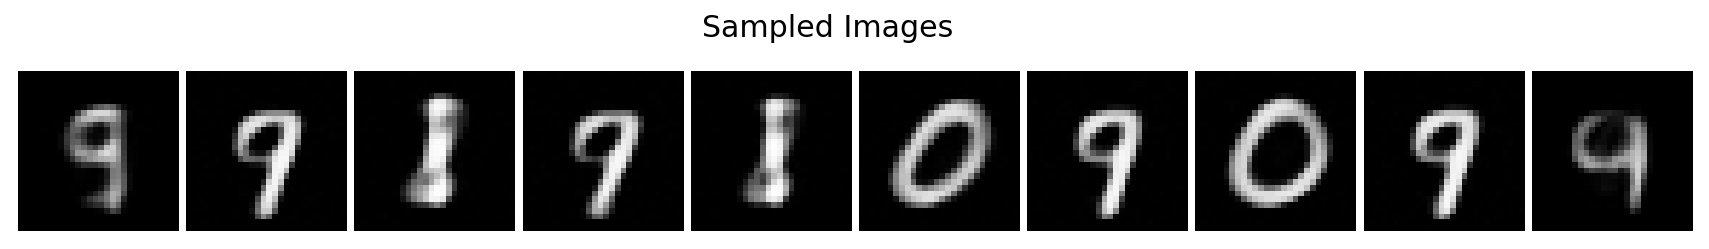

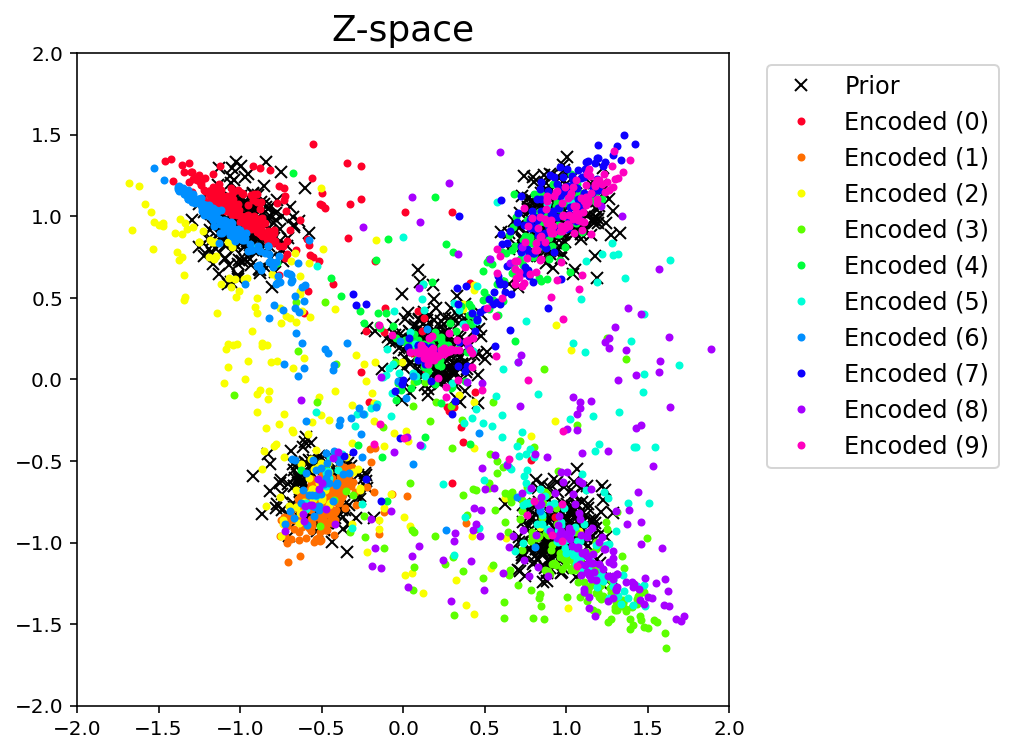

[8000/10000]Loss AE:39.718 D:1.386 G:0.693 total loss:41.797


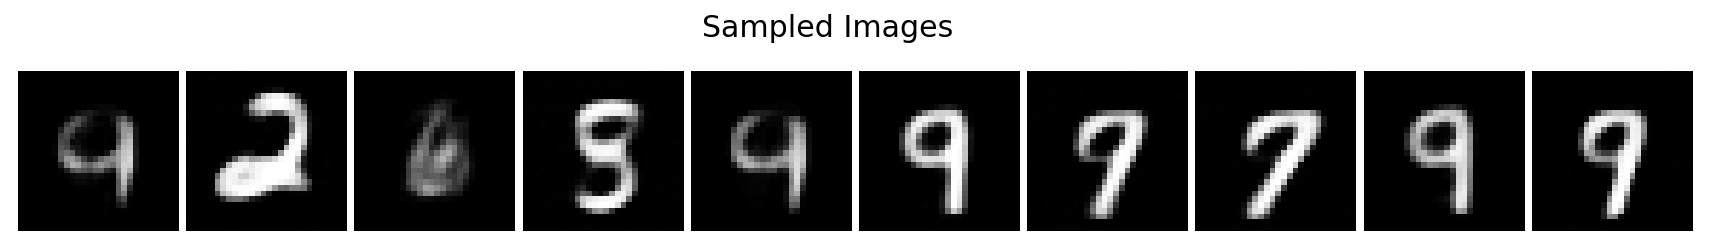

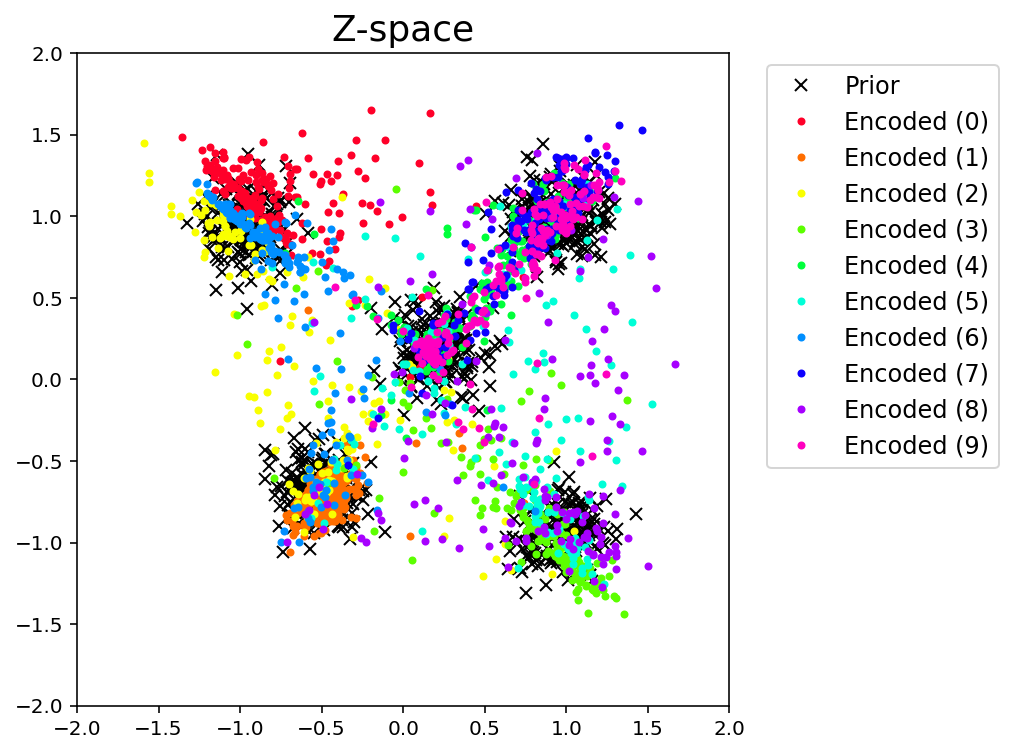

[9000/10000]Loss AE:37.078 D:1.386 G:0.693 total loss:39.157


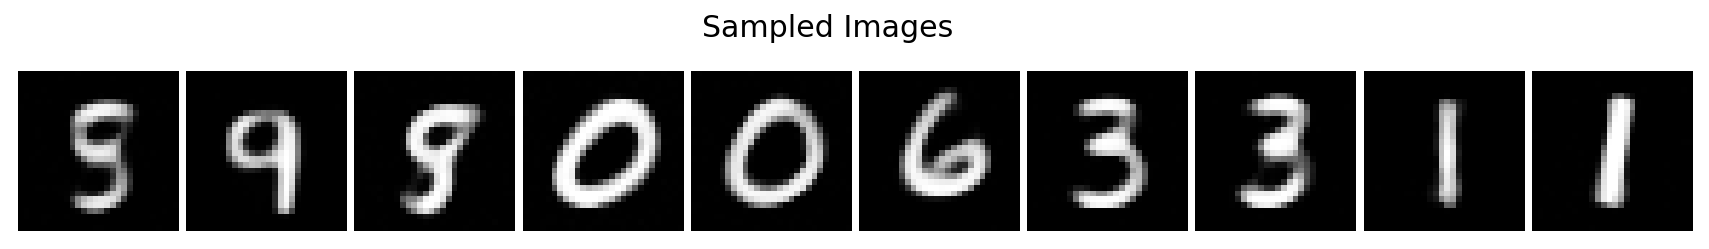

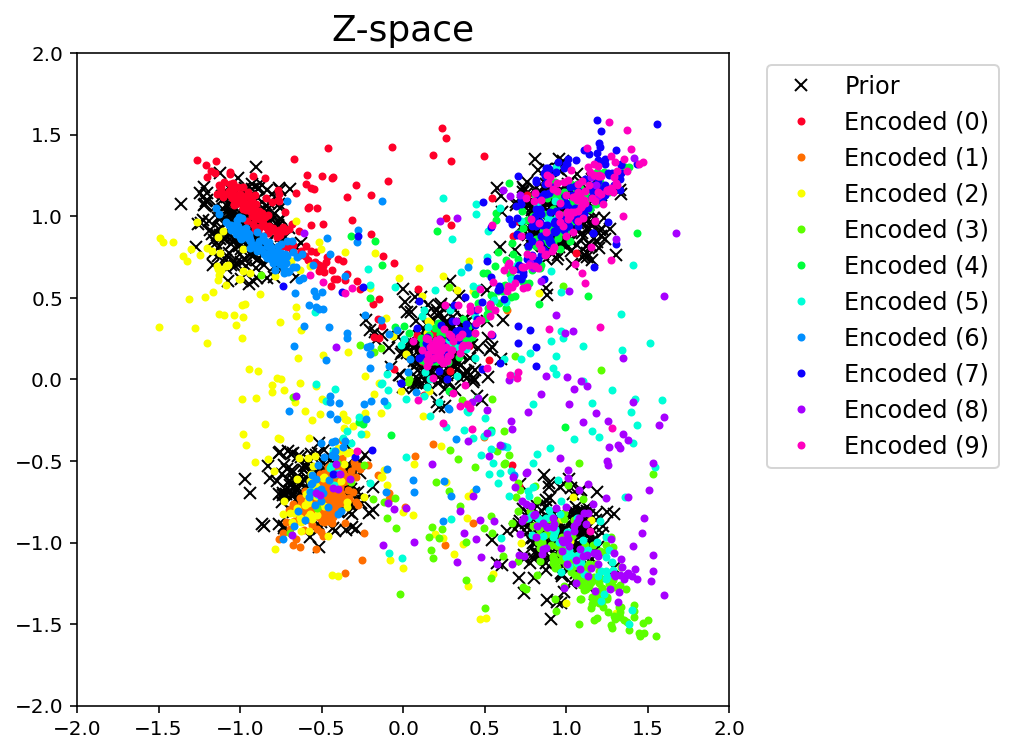

[10000/10000]Loss AE:37.952 D:1.386 G:0.693 total loss:40.031


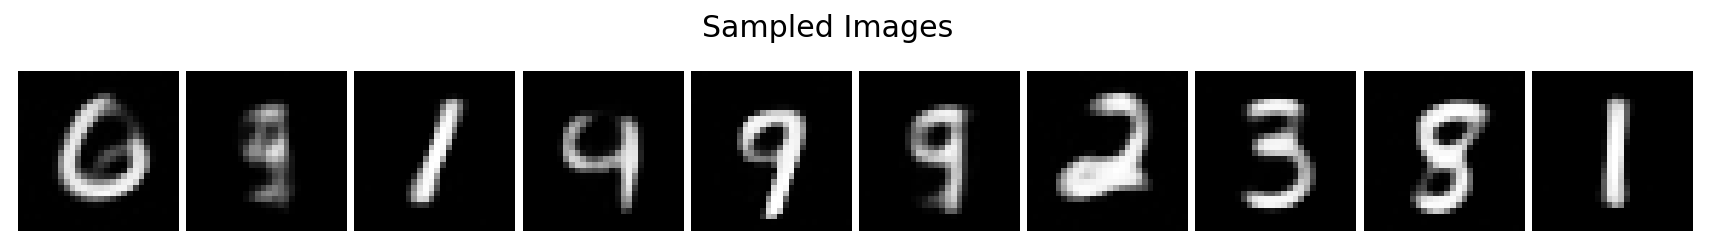

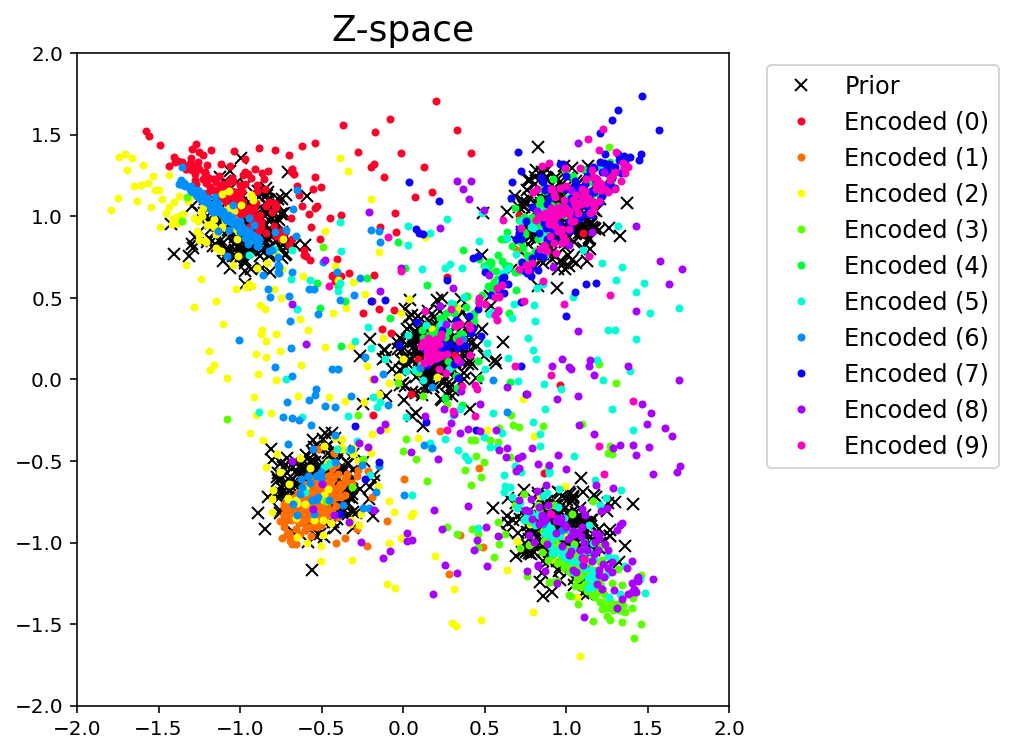

[train] Done.


In [3]:
mnist = get_mnist()
X,Y = mnist.train.images, mnist.train.labels
AAE.train(_X=X,_Y=Y,_max_iter=1e4,_batch_size=128,_PRINT_EVERY=1e3,_PLOT_EVERY=1e3)